In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as nps
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

sc.settings.n_jobs = 96
sc.set_figure_params(figsize=(5, 5), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [2]:
import decoupler as dc

# Load adata

In [3]:
adata = sc.read_h5ad("Data/ROSMAP2_Complete_Annotated_Clinical_0206.h5ad") # 11m

In [4]:
adata

AnnData object with n_obs × n_vars = 1560049 × 5000
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'Library', 'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'batch_numeric', 'sampleID_numeric', 'cluster_Allen', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'cluster_Endo', 'cluster_Endo2', 'cluster_Allen2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Sex_colors', 'cluster_Allen2_colors', 'cluster_Allen_colors', 'cluster_Endo2_colors', 'clu

In [5]:
adata_raw = sc.read_h5ad("Data/ROSMAP2_Rawdata_Complete_0104.h5ad") # 50m -> 30m

In [6]:
adata_raw

AnnData object with n_obs × n_vars = 1560049 × 35476
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'Library', 'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'batch_numeric', 'sampleID_numeric', 'cluster_Allen', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'cluster_Endo', 'cluster_Endo2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'
    layers: 'counts', 'logcounts'

In [7]:
import numpy as np
np.max(adata_raw.X)

7.8690367

In [8]:
adata = adata.raw.to_adata() # 6m

In [9]:
adata

AnnData object with n_obs × n_vars = 1560049 × 35476
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'Library', 'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'batch_numeric', 'sampleID_numeric', 'cluster_Allen', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'cluster_Endo', 'cluster_Endo2', 'cluster_Allen2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Sex_colors', 'cluster_Allen2_colors', 'cluster_Allen_colors', 'cluster_Endo2_colors', 'cluster_Endo_colo

In [10]:
adata.layers["logcounts"] = adata.X.copy()

In [11]:
adata.layers["counts"] = adata_raw.layers["counts"]

In [12]:
adata.obs.columns

Index(['batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'Library',
       'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis',
       'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden',
       'batch_numeric', 'sampleID_numeric', 'cluster_Allen', 'projid', 'Study',
       'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max',
       'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx',
       'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv',
       'individualID', 'cluster_Endo', 'cluster_Endo2', 'cluster_Allen2'],
      dtype='object')

In [13]:
adata.obs["cluster_Endo"].value_counts()

vEndo         3930
aEndo         3749
Fibroblast    3243
Pericyte      2832
cEndo         2328
SMC           1686
Name: cluster_Endo, dtype: int64

In [14]:
adata.obs["cluster_Endo2"].value_counts()

Endothelial        10007
Non-Endothelial     7761
Name: cluster_Endo2, dtype: int64

In [15]:
adata.obs["cluster_Allen"].value_counts()

Oligodendrocyte    318484
Ext LINC00507      316255
Astrocyte          217601
Ext RORB           212683
Microglia           83529
Inh SST             82799
Inh PVALB           73748
Inh VIP             62931
OPC                 62492
Ext THEMIS          42488
Ext FEZF2           42186
Inh LAMP5           26787
Vascular            17769
Others                297
Name: cluster_Allen, dtype: int64

In [16]:
adata.obs["cluster_Allen2"].value_counts()

Oligodendrocyte    318484
Ext LINC00507      316255
Astrocyte          217601
Ext RORB           212683
Microglia           83529
Inh SST             82799
Inh PVALB           73748
Inh VIP             62931
OPC                 62492
Ext THEMIS          42488
Ext FEZF2           42186
Inh LAMP5           26787
Endothelial         10007
Fibroblast           3243
Pericyte             2832
SMC                  1686
Others                297
Name: cluster_Allen2, dtype: int64

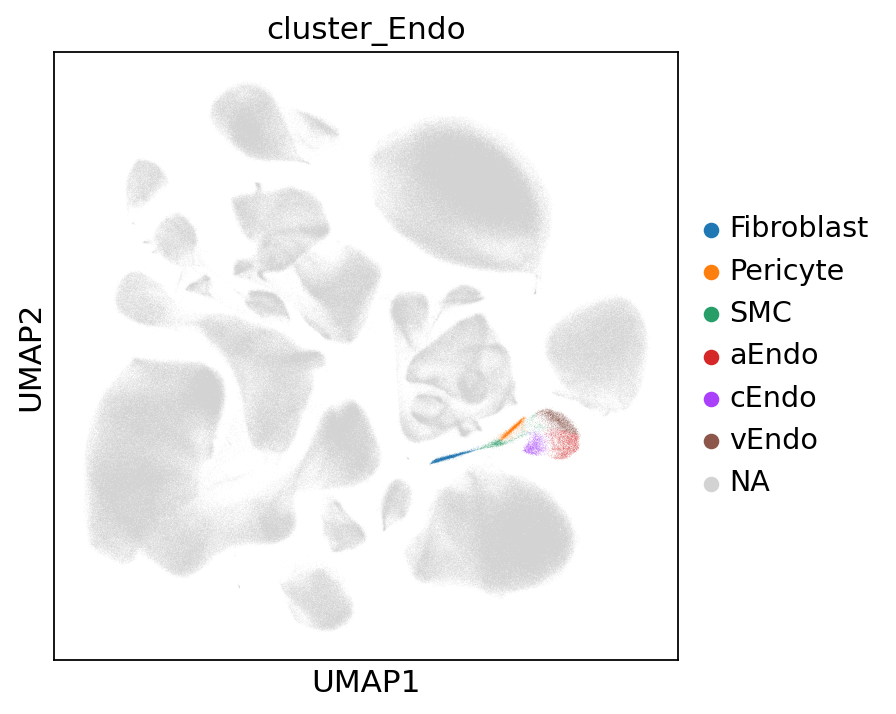

In [17]:
sc.pl.umap(adata, color = "cluster_Endo")

In [18]:
# Assuming adata is already defined and adata.obs is a DataFrame
# Create a copy of the existing 'cluster_Endo' column
cluster_Endo_copy = adata.obs["cluster_Endo"].copy()

# Define the mapping for the renaming
rename_mapping = {
    'cEndo': 'vEndo',
    'aEndo': 'cEndo',
    'vEndo': 'aEndo'
}

# Apply the renaming based on the mapping
adata.obs["cluster_Endo"] = cluster_Endo_copy.replace(rename_mapping)

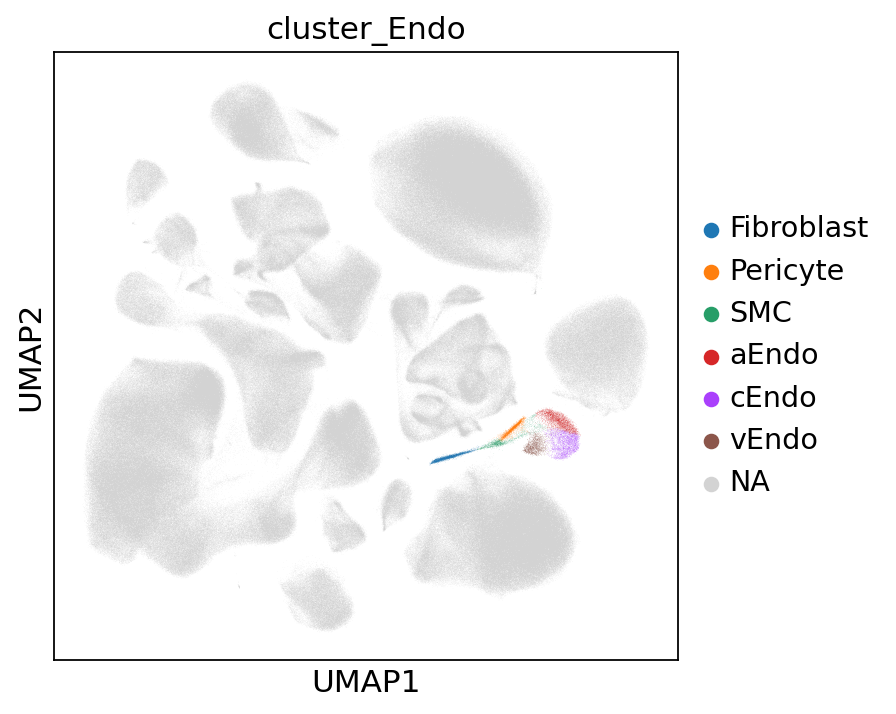

In [19]:
sc.pl.umap(adata, color = "cluster_Endo")

In [20]:
adata = adata[(adata.obs['cluster_Allen'] != "Vascular") | ((adata.obs['cluster_Allen'] == "Vascular") & (adata.obs["cluster_Endo"].notna()))]

In [21]:
adata

View of AnnData object with n_obs × n_vars = 1560048 × 35476
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'Library', 'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'batch_numeric', 'sampleID_numeric', 'cluster_Allen', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'cluster_Endo', 'cluster_Endo2', 'cluster_Allen2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Sex_colors', 'cluster_Allen_colors', 'cluster_Endo2_colors', 'cluster_Endo_colors', 'cluster_mai

In [22]:
adata_sub = adata[(adata.obs["cluster_Endo"].notna())].copy()

In [23]:
adata_sub

AnnData object with n_obs × n_vars = 17768 × 35476
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'Library', 'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'batch_numeric', 'sampleID_numeric', 'cluster_Allen', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'cluster_Endo', 'cluster_Endo2', 'cluster_Allen2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Sex_colors', 'cluster_Allen_colors', 'cluster_Endo2_colors', 'cluster_Endo_colors', 'cluster_main_colors',

In [28]:
adata_sub.write_h5ad("ROSMAP2_cluster_Endo_adata_sub.h5ad")

In [29]:
adata.write_h5ad("ROSMAP2_cluster_Endo_adata.h5ad") # 67m

# Pseudobulk Aggregation (decoupleR)

In [24]:
# Get filtered pseudo-bulk profile
pdata_raw = dc.get_pseudobulk(
    adata_sub,
    sample_col='sampleID',
    groups_col='cluster_Endo',
    layer='counts',
    mode='sum',
    min_cells=10,
    min_counts=1000
)
pdata_raw # 5m

AnnData object with n_obs × n_vars = 566 × 30795
    obs: 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'Library', 'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'sampleID_numeric', 'cluster_Allen', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'cluster_Endo', 'cluster_Endo2', 'cluster_Allen2', 'psbulk_n_cells', 'psbulk_counts'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    layers: 'psbulk_props'

In [26]:
pdata_raw.obs = pdata_raw.obs.apply(lambda x: x.astype(str))

In [27]:
pdata_raw.write_h5ad("Data/Pseudobulk_ROSMAP2_count_sum_Endo_0520.h5ad")

# PCA

In [13]:
pdata.obs["Age"] = pdata.obs["Age"].astype(float)
pdata.obs["PMI"] = pdata.obs["PMI"].astype(float)

In [14]:
pp_pdata = pdata.copy()
sc.pp.normalize_total(pp_pdata, target_sum=1e6) #library size normalisation
sc.pp.log1p(pp_pdata) # log(1+p) transformation
sc.pp.scale(pp_pdata, max_value=10)
sc.tl.pca(pp_pdata, n_comps=10)

In [15]:
pp_pdata

AnnData object with n_obs × n_vars = 5821 × 35476
    obs: 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'Library', 'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'sampleID_numeric', 'cluster_Allen', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'cluster_Endo2', 'cluster_Allen2', 'psbulk_n_cells', 'psbulk_counts'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props'

In [46]:
# diagnosis_mapping = {
#     'AD_dcfdx1': 'Dx value 1',
#     'AD_dcfdx2': 'Dx value 2',
#     'AD_dcfdx3': 'Dx value 3',
#     'AD_dcfdx4': 'Dx value 4',
#     'AD_dcfdx5': 'Dx value 5',
#     'AD_dcfdx6': 'Dx value 6'
# }

# # Create a new column 'diagnosis2' based on the conditions using the mapping dictionary
# pp_pdata.obs['Diagnosis'] = pp_pdata.obs['Diagnosis'].map(diagnosis_mapping)

In [ ]:
# pp_pdata.obs['Library Batch (Numeric)'] = pp_pdata.obs['batch'].cat.codes
# pp_pdata.obs['PMI (hours)'] = pp_pdata.obs['PMI'].astype(float)

# sc.pl.pca(pp_pdata, color=['cluster_Allen2', 'Diagnosis', 'Library Batch (Numeric)', 'PMI (hours)'], 
#           ncols=2, show=True, size=50, wspace=0.5)